# Chapter 5 Exercises

1. What is the fundamental idea behind support vector machines? 
 - SVMs aim to create the widest possible street or margin between two groups. They use the data points from each group which are closest to the other group (support vectors) to define this margin.
 - Goal is to have the widest possible margin between the decision boundary and the training instances. 
 - Also important to use kernels for training on nonlinear datasets. 
2. What is a support vector? 
 - support vectors are the data points at the boundary between two groups of data. They are used to define the border between the two groups and calculate predictions. 
 - Instances which are not on the margin do not affect the training or predictions. 
3. Why is it important to scale the inputs when using SVMs?
 - SVMs ultimately rely upon measuring the distance between points in order to create the widest possible margin between groups. Having features of vastly different scales distorts the distances between points and overweights the feature with the larger scale. 
4. Can an SVM output a confidence score when it classifies an instance? What about a probability? 
 - The output of the decision function or the distance between an instance and the decision boundary can be used as a confidence score. SVMs do not output a probability for each class. 
 - Using logisitic regression and cross validation, sklearn can calculate a probability for each instance when using an SVM. 
5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features? 
 - You should use the primal form. The dual form is faster when the number of features is greater than the number of instances. 
 - nonlinear (kernelized) SVMs can only use the dual form. 
 - computational complexity for the primal form is directly proportional to the number of instances m, while for the dual form it is an exponential relationship, $m^2$ or $m^3$
6. Say you've trained an SMV classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease gamma? What about C?
 - Increase gamma to decrease each instances range of influence on the decision boundary. This will introduce more variation in the decision boundary and reduce underfitting. Alternatively you could also increase C. 
7. How should you set the QP parameters to solve the soft margin linear SVM classifier problem using an off the shelf QP solver? 
 - H an identity matrix of size 2m by 2m + 1 where m equals the number of instances. Top left value is zero to ignore the bias term. 
 - f a vector of zeros with length = # features + 1 for bias term and concatenated with a vector with each element = C of length = #instances
 - A a matrix of size #constraints x #features+1 plus an mxm identity matrix to the right, an inverse identity matrix below that, and zeros in the remainder of the array. 
 - b is a vector of -1s of length equal to the number of training instances concatenated with a vector of 0s equal in length to #instances

# 8. Train a linear SVC on a linearly separable dataset. 
 - Then train an SVC and a SGDClassifier on the same dataset. 
 - See if you can get them to produce roughly the same model. 

In [148]:
from sklearn import datasets
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
#load iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

#create a binary classification dataset 
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

#scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [61]:
#train a linear svc
lin_svc = LinearSVC()
lin_svc.fit(X_train,y_train)

LinearSVC()

In [62]:
#train an SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [63]:
#train an SGD classifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_predict

In [64]:
#evauluate the models
y_train_pred = cross_val_predict(lin_svc, X_train, y_train, cv=3)
print('linear SVC model')
print('confusion matrix: ')
print(confusion_matrix(y_train, y_train_pred))
print('Precision score: ' + str(precision_score(y_train, y_train_pred)))
print('Recall score: ' + str(recall_score(y_train, y_train_pred)))
print()
y_train_pred = cross_val_predict(svc, X_train, y_train, cv=3)
print('SVC model')
print('confusion matrix: ')
print(confusion_matrix(y_train, y_train_pred))
print('Precision score: ' + str(precision_score(y_train, y_train_pred)))
print('Recall score: ' + str(recall_score(y_train, y_train_pred)))
print()
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
print('SGD Classifier model')
print('confusion matrix: ')
print(confusion_matrix(y_train, y_train_pred))
print('Precision score: ' + str(precision_score(y_train, y_train_pred)))
print('Recall score: ' + str(recall_score(y_train, y_train_pred)))

linear SVC model
confusion matrix: 
[[36  0]
 [ 0 39]]
Precision score: 1.0
Recall score: 1.0

SVC model
confusion matrix: 
[[36  0]
 [ 0 39]]
Precision score: 1.0
Recall score: 1.0

SGD Classifier model
confusion matrix: 
[[36  0]
 [ 0 39]]
Precision score: 1.0
Recall score: 1.0


In [ ]:
#looks like the classification problem is ridiculously easy. But are all the models actually the same? 

In [65]:
#compare the decision boundaries of the models 
print('linear SVC model:')
print('intercept = ' + str(lin_svc.intercept_))
print('coefficients = ' + str(lin_svc.coef_))
print()
print('SVC model:')
print('intercept = ' + str(svc.intercept_))
print('coefficients = ' + str(svc.coef_))
print()
print('linear SVC model:')
print('intercept = ' + str(sgd_clf.intercept_))
print('coefficients = ' + str(sgd_clf.coef_))
print()

linear SVC model:
intercept = [-1.28076334]
coefficients = [[1.8502869 1.5640157]]

SVC model:
intercept = [-1.64707417]
coefficients = [[2.41156624 2.00030183]]

linear SVC model:
intercept = [-9.89384727]
coefficients = [[10.72274502 10.8074726 ]]



In [68]:
# No. The models are not the same but they are similar. 
lin_svc.coef_[0, 0]

1.850286901585445

In [72]:
#should plot all the training points and the decision boundaries. Need some lines to plot first. 
slope1 = -lin_svc.coef_[0, 0]/lin_svc.coef_[0, 1]
bias1 = -lin_svc.intercept_[0]/lin_svc.coef_[0, 1]
slope2 = -svc.coef_[0, 0]/svc.coef_[0, 1]
bias2 = -svc.intercept_[0]/svc.coef_[0, 1]
slope3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
bias3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

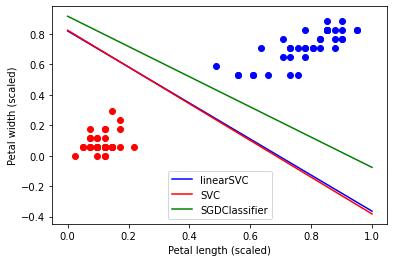

In [75]:
plt.plot([0,1], [0*slope1+bias1, 1*slope1+bias1], label='linearSVC', c='b')
plt.plot([0,1], [0*slope2+bias2, 1*slope2+bias2], label='SVC', c='r')
plt.plot([0,1], [0*slope3+bias3, 1*slope3+bias3], label='SGDClassifier', c='g')
plt.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1], c='b')
plt.scatter(X_train[:,0][y_train==0],X_train[:,1][y_train==0], c='r')
plt.xlabel('Petal length (scaled)')
plt.ylabel('Petal width (scaled)')
plt.legend(loc='lower center')

In [ ]:
# So the linearSVC and SVC models look very similar. This is not surprising since I used a linear kernel
# for the SVC model. But the SGD Classifier looks very different. Need to modifiy its hyperparameters 

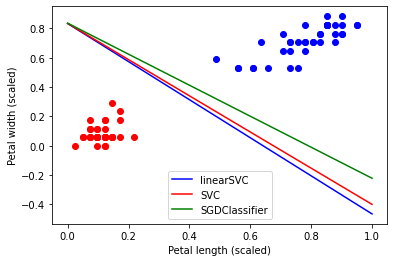

In [83]:
#retry with new hyperparameters to get more similar models
C = 5
alpha = 1 / (C * len(X))

#Train on new hyperparameters
lin_svc = LinearSVC(C=C)
lin_svc.fit(X_train,y_train)

svc = SVC(kernel='linear', C=C)
svc.fit(X_train, y_train)

sgd_clf = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.001, alpha=alpha, 
                        max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)

#calculate the new decision boundary
slope1 = -lin_svc.coef_[0, 0]/lin_svc.coef_[0, 1]
bias1 = -lin_svc.intercept_[0]/lin_svc.coef_[0, 1]
slope2 = -svc.coef_[0, 0]/svc.coef_[0, 1]
bias2 = -svc.intercept_[0]/svc.coef_[0, 1]
slope3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
bias3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

#replot
plt.plot([0,1], [0*slope1+bias1, 1*slope1+bias1], label='linearSVC', c='b')
plt.plot([0,1], [0*slope2+bias2, 1*slope2+bias2], label='SVC', c='r')
plt.plot([0,1], [0*slope4+bias4, 1*slope4+bias4], label='SGDClassifier', c='g')
plt.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1], c='b')
plt.scatter(X_train[:,0][y_train==0],X_train[:,1][y_train==0], c='r')
plt.xlabel('Petal length (scaled)')
plt.ylabel('Petal width (scaled)')
plt.legend(loc='lower center')

In [ ]:
#well now the biases are the same. The slopes are very similar as well. 

# 9. Train an SVM classifier on the MNIST dataset. 
 - Since SVM classifiers are binary classifiers, you will need to use one versus the rest to classifiy all 10 digits.
 - Tune the hyperparameters using small validation sets to speed up the process. 
 - What accuracy can you reach?

In [86]:
from sklearn.datasets import fetch_openml
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float32))

X_train = X_scaled[:60000]
y_train = y[:60000]
X_test = X_scaled[60000:]
y_test = y[60000:]

In [87]:
#train the model 
ovr_clf = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
ovr_clf.fit(X_train, y_train)

#evaluate the model
y_train_pred = cross_val_predict(ovr_clf, X_train, y_train, cv=3)
print('linear SVC model')
print('confusion matrix: ')
print(confusion_matrix(y_train, y_train_pred))

linear SVC model
confusion matrix: 
[[5738    2   31    9    8   55   39    8   25    8]
 [   1 6593   38   16    8    8    5   16   53    4]
 [  50   94 5368  117   70   26   57   65   97   14]
 [  22   42  179 5477    9  206    5   43  106   42]
 [  19   27   65    7 5464   11   36   25   13  175]
 [  68   30   55  256   41 4753   79    7   94   38]
 [  54    7   84    4   61   93 5595    0   20    0]
 [  10   34   75   57   86   16    1 5818   10  158]
 [  52  127  136  215   33  167   42   31 4994   54]
 [  23   26   38   75  252   38    2  214   55 5226]]


NameError: name 'y_pred' is not defined

In [90]:
print('accuracy = ' + str(accuracy_score(y_train, y_train_pred)) + '%')
# 91% is not great for mnist

accuracy = 0.9171%


In [120]:
#train on a smaller portion of the dataset to speed up the hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'C':[3,5,7], 'gamma':[0.001, 0.01, 0.1]},
]

ovr_clf = SVC(decision_function_shape='ovr', random_state=42)
grid_search = GridSearchCV(ovr_clf, param_grid, cv=5,
                                scoring='accuracy',
                                verbose=2,
                                return_train_score=True)

grid_search.fit(X_train[:1000], y_train[:1000])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=3, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=3, gamma=0.001, total=   1.1s
[CV] C=3, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ................................. C=3, gamma=0.001, total=   1.1s
[CV] C=3, gamma=0.001 ................................................
[CV] ................................. C=3, gamma=0.001, total=   1.0s
[CV] C=3, gamma=0.001 ................................................
[CV] ................................. C=3, gamma=0.001, total=   1.1s
[CV] C=3, gamma=0.001 ................................................
[CV] ................................. C=3, gamma=0.001, total=   1.1s
[CV] C=3, gamma=0.01 .................................................
[CV] .................................. C=3, gamma=0.01, total=   2.0s
[CV] C=3, gamma=0.01 .................................................
[CV] .................................. C=3, gamma=0.01, total=   2.0s
[CV] C=3, gamma=0.01 .................................................
[CV] .................................. C=3, gamma=0.01, total=   2.1s
[CV] C=3, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.3min finished


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'C': [3, 5, 7], 'gamma': [0.001, 0.01, 0.1]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [123]:
print('best params: ')
print(grid_search.best_params_)
print()

best params: 
{'C': 5, 'gamma': 0.001}



In [125]:
grid_search.best_estimator_.fit(X_train, y_train)

SVC(C=5, gamma=0.001, random_state=42)

In [129]:
#evaluate the model
y_train_pred = grid_search.best_estimator_.predict(X_train)
print('linear SVC model')
print('confusion matrix: ')
print(confusion_matrix(y_train, y_train_pred))
print('accuracy = ' + str(accuracy_score(y_train, y_train_pred)) + '%')
print('Precision score: ' + str(precision_score(y_train, y_train_pred)))
print('Recall score: ' + str(recall_score(y_train, y_train_pred)))
print()

#check for over/underfitting
y_pred = grid_search_cv.best_estimator_.predict(X_test)
print('test set accuracy = ' + accuracy_score(y_test, y_pred) + '%')

linear SVC model
confusion matrix: 
[[5918    0    0    0    0    0    2    0    2    1]
 [   1 6729    1    1    0    0    0    5    1    4]
 [   1    3 5941    1    5    0    0    4    3    0]
 [   0    2    5 6086    0   13    0    6   12    7]
 [   1    4    0    0 5809    0    3    0    2   23]
 [   1    0    0   10    1 5396    8    0    2    3]
 [   4    0    0    0    4    2 5908    0    0    0]
 [   1   15    4    0    8    0    0 6222    1   14]
 [   1   11    2    5    1    4    1    2 5820    4]
 [   2    3    0    5   19    2    1   13    7 5897]]


NameError: name 'y_pred' is not defined

# 10. Train an SVM Regressor on the California Housing dataset.

In [130]:
#load and unpack the data
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [146]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
#train the model
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [136]:
#evaluate the model
from sklearn.metrics import mean_squared_error
y_train_pred = svr.predict(X_train)
print('Root Mean Squared Error for SVR model: ' + str(np.sqrt(mean_squared_error(y_train, y_train_pred))))

Root Mean Squared Error for SVR model: 0.5819774572966296


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [147]:
#try some hyperparameter tuning
param_dist = [
    {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 5)}
]

rand_search_cv = RandomizedSearchCV(SVR(), param_dist, 
                                    n_iter=8, 
                                    verbose=2, 
                                    cv=3, 
                                    random_state=42)
rand_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=2.8727005942368127, gamma=0.07969454818643928 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=2.8727005942368127, gamma=0.07969454818643928, total=  12.7s
[CV] C=2.8727005942368127, gamma=0.07969454818643928 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.6s remaining:    0.0s


[CV] .. C=2.8727005942368127, gamma=0.07969454818643928, total=  12.4s
[CV] C=2.8727005942368127, gamma=0.07969454818643928 .................
[CV] .. C=2.8727005942368127, gamma=0.07969454818643928, total=  12.5s
[CV] C=4.659969709057025, gamma=0.015751320499779724 .................
[CV] .. C=4.659969709057025, gamma=0.015751320499779724, total=  11.9s
[CV] C=4.659969709057025, gamma=0.015751320499779724 .................
[CV] .. C=4.659969709057025, gamma=0.015751320499779724, total=  11.5s
[CV] C=4.659969709057025, gamma=0.015751320499779724 .................
[CV] .. C=4.659969709057025, gamma=0.015751320499779724, total=  11.8s
[CV] C=1.7800932022121825, gamma=0.002051110418843397 ................
[CV] . C=1.7800932022121825, gamma=0.002051110418843397, total=  11.2s
[CV] C=1.7800932022121825, gamma=0.002051110418843397 ................
[CV] . C=1.7800932022121825, gamma=0.002051110418843397, total=  11.2s
[CV] C=1.7800932022121825, gamma=0.002051110418843397 ................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=8,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029AD994FD30>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029AD9A22580>}],
                   random_state=42, verbose=2)

In [149]:
print('best params: ')
print(rand_search_cv.best_params_)

best params: 
{'C': 2.8727005942368127, 'gamma': 0.07969454818643928}


In [154]:
rand_search_cv.best_estimator_.fit(X_train, y_train)

SVR(C=2.8727005942368127, gamma=0.07969454818643928)

In [156]:
#evaluate the optimized model
y_train_pred = rand_search_cv.best_estimator_.predict(X_train)
print('Root Mean Squared Error for SVR model: ' + str(np.sqrt(mean_squared_error(y_train, y_train_pred))))

Root Mean Squared Error for SVR model: 0.5837259747469998


In [158]:
print(cvres)

{'mean_fit_time': array([10.30396827,  9.58124995,  8.78003907,  9.50419378, 10.63640086,
        8.69959879,  8.8027362 ,  9.74141184]), 'std_fit_time': array([0.19234508, 0.15861087, 0.09660366, 0.56185443, 0.22192914,
       0.18006158, 0.29584123, 0.41387429]), 'mean_score_time': array([2.21933309, 2.18700814, 2.34600806, 2.21068859, 2.31600205,
       2.05522323, 2.38402987, 2.51867191]), 'std_score_time': array([0.08218747, 0.0191859 , 0.05661766, 0.02335452, 0.20239579,
       0.01734654, 0.24020432, 0.18357319]), 'param_C': masked_array(data=[2.8727005942368127, 4.659969709057025,
                   1.7800932022121825, 1.2904180608409974,
                   4.005575058716044, 1.1029224714790122,
                   5.162213204002109, 1.909124836035503],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.07969454818643928, 0.015751320499779724,
                   0.00205